# Convolution networks for the MNIST dataset

[Convolution neural networks](https://en.wikipedia.org/wiki/Convolutional_neural_network)
are a form of artificial neural networks that are used for analyzing visual imagery.

The [MNIST](https://en.wikipedia.org/wiki/MNIST_database)
(Modified National Institute of Standards and Technology) is a database of that is used for training image processing systems.

The Keras library makes it easy to download multiple [datasets](https://keras.io/datasets/) including the MNIST dataset.

*  https://elitedatascience.com/keras-tutorial-deep-learning-in-python
*  https://keras.io/getting-started/sequential-model-guide/

In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

from sklearn.metrics import confusion_matrix

import pandas as pd
import seaborn as sns

Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Display the image format used for Tensorflow

In [27]:
K.image_data_format()

'channels_last'

Display the devices available for Tensorflow & Keras

In [42]:
from tensorflow.python.client import device_lib
for item in device_lib.list_local_devices():
    print('name: {}, memory {}'.format(item.name, item.memory_limit))

name: /device:CPU:0, memory 268435456
name: /device:GPU:0, memory 262537216


Keras runs on the GPU if it is present. To force it to run on the CPU set the CUDA_VISIBLE_DEVICES variable

In [43]:
import os
# uncomment the following line to run only on CPU
# restart the Jupyter notebook before each change
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

# On the p2.xlarge
# CPU: 163 seconds, GPU: 12 seconds for each epoch

In [44]:
def plot_gray_image(img, title, ax):
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.imshow(img, cmap=cm.gray)
    ax.set_title(title)

In [45]:
num_classes = 10

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')

print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [46]:
# convert class vectors to binary class matrices
y_train_bin = keras.utils.to_categorical(y_train, num_classes)
y_test_bin = keras.utils.to_categorical(y_test, num_classes)

In [47]:
batch_size = 128
epochs = 10

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [48]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
__________

In [49]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [50]:
model.fit(x_train, y_train_bin,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test_bin))
score = model.evaluate(x_test, y_test_bin, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 182us/step - loss: 0.3478 - acc: 0.8935 - val_loss: 0.0805 - val_acc: 0.9755
Epoch 2/10
60000/60000 [==============================] - 10s 172us/step - loss: 0.1176 - acc: 0.9653 - val_loss: 0.0542 - val_acc: 0.9828
Epoch 3/10
60000/60000 [==============================] - 10s 172us/step - loss: 0.0876 - acc: 0.9742 - val_loss: 0.0462 - val_acc: 0.9848
Epoch 4/10
60000/60000 [==============================] - 10s 172us/step - loss: 0.0767 - acc: 0.9771 - val_loss: 0.0377 - val_acc: 0.9876
Epoch 5/10
60000/60000 [==============================] - 10s 173us/step - loss: 0.0647 - acc: 0.9811 - val_loss: 0.0373 - val_acc: 0.9878
Epoch 6/10
60000/60000 [==============================] - 10s 172us/step - loss: 0.0570 - acc: 0.9834 - val_loss: 0.0338 - val_acc: 0.9883
Epoch 7/10
60000/60000 [==============================] - 10s 172us/step - loss: 0.0520 - acc: 0.9847 - val_loss: 0.

In [51]:
y_predict = model.predict_classes(x_test)

10000/10000 [==============================] - 1s 112us/step


In [52]:
err_idx = np.where(y_test != y_predict)[0]

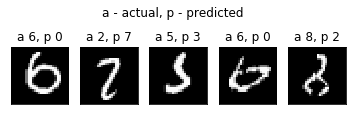

In [53]:
err_plot_size = 5
fig, ax_list = plt.subplots(nrows=1, ncols=err_plot_size)
fig.set_size_inches(w=6, h=2)
fig.suptitle('a - actual, p - predicted')
for idx, ax in enumerate(ax_list):
    data_idx = err_idx[idx]
    msg = 'a {}, p {}'.format(y_test[data_idx], y_predict[data_idx])
    plot_gray_image(x_test[data_idx].squeeze(), msg, ax)

In [13]:
cmatrix = confusion_matrix(y_test, y_predict)
df_cm = pd.DataFrame(cmatrix)
df_cm

,0,1,2,3,4,5,6,7,8,9
0,977,0,0,0,0,0,1,1,1,0
1,0,1133,2,0,0,0,0,0,0,0
2,1,1,1024,0,1,0,0,4,1,0
3,0,0,2,1002,0,2,0,2,2,0
4,0,0,0,0,975,0,3,0,1,3
5,2,0,1,6,0,879,3,0,1,0
6,5,2,0,0,1,1,946,0,3,0
7,1,2,9,2,0,0,0,1013,1,0
8,4,1,2,1,1,0,0,2,962,1
9,2,2,0,2,4,4,0,5,5,985


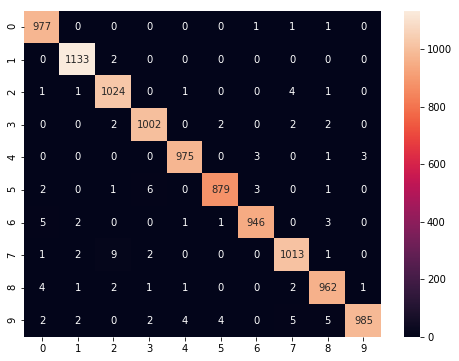

In [54]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, fmt='.0f', ax=ax)

Add confusion matrix
* https://blog.plon.io/tutorials/cifar-10-classification-using-keras-tutorial/

Measuring performance
* https://machinelearningmastery.com/custom-metrics-deep-learning-keras-python/
* https://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/

Mnist with CNN
* https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/